In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import searchnets

In [2]:
ROOT = Path('~/Documents/repos/L2M/visual-search-nets')
ROOT = ROOT.expanduser()
DATA_DIR = ROOT.joinpath('data')

In [3]:
data_csv_path = ROOT.joinpath('../visual_search_stimuli/alexnet_multiple_stims/alexnet_multiple_stims_120000samples_split.csv')
results_gz_path = DATA_DIR.joinpath('results/alexnet_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples/searchnets_alexnet_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples_trained_200_epochs_test_results.gz')
net_name = 'alexnet'
method = 'transfer'
learning_rate = 1e-3

In [4]:
df_list = []

for method in ['initialize', 'transfer']:
    if method == 'transfer':
        results_gz_path = DATA_DIR.joinpath('results/alexnet_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples/searchnets_alexnet_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples_trained_200_epochs_test_results.gz')
    elif method == 'initialize':
        results_gz_path = DATA_DIR.joinpath('results/alexnet_initialize_lr_1e-03_multiple_stims_120000samples/searchnets_alexnet_initialize_lr_1e-03_multiple_stims_120000samples_trained_200_epochs_test_results.gz')
    df_list.append(
        searchnets.utils.general.results_df(data_csv_path, results_gz_path, net_name, method, learning_rate)
    )

df = pd.concat(df_list)

/home/bart/Documents/repos/L2M/visual-search-nets/src/searchnets/utils/general.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testset['y_true'] = df_testset['target_condition'] == 'present'
/home/bart/Documents/repos/L2M/visual-search-nets/src/searchnets/utils/general.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testset['y_pred'] = preds_per_model[key]
/home/bart/Documents/repos/L2M/visual-search-nets/src/searchnets/utils/metrics.py:15: RuntimeWarning: invalid value encountered in long_s

In [5]:
pal = sns.color_palette('muted')

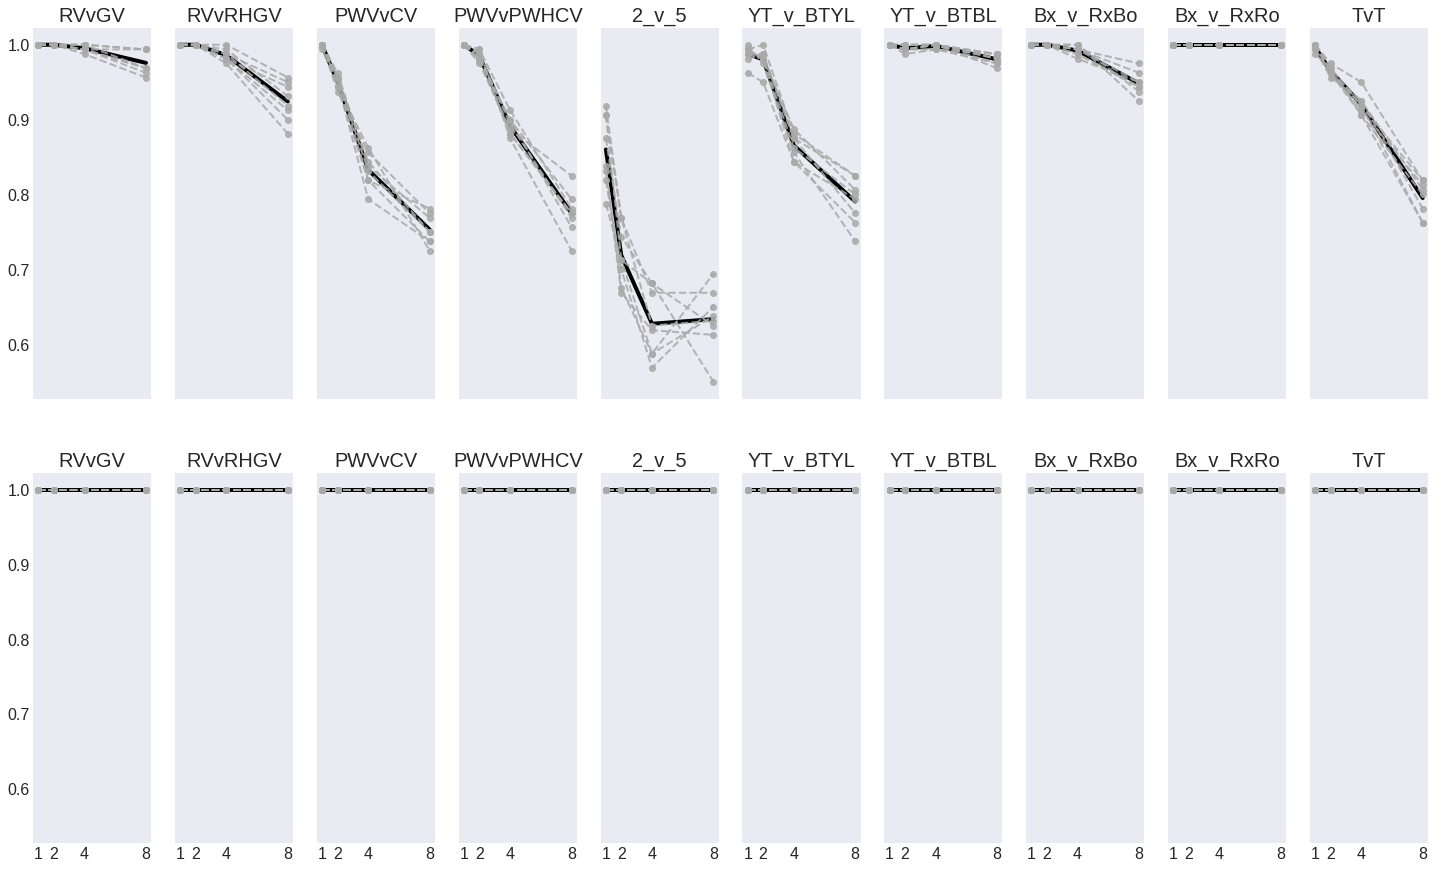

In [9]:
figsize=(25,15)
fig, ax = plt.subplots(2, 10, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

net_name = 'alexnet'
for row, method in enumerate(['transfer', 'initialize']):
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'],
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'])):
            if row==1 and col==0:
                add_legend=False
            else:
                add_legend=False

            both_color = pal[0]
            mn_both_color = pal[0]
                
            searchnets.plot.metric_v_set_size_df(df=df, 
                                                 net_name=net_name,
                                                 method=method, 
                                                 stimulus=stim_abbrev,
                                                 metric='accuracy', 
                                                 conditions=['both'],
                                                 set_ylim=False,
                                                 ax=ax[row, col],
                                                 ylim=(0.5, 1.05),
                                                 add_legend=add_legend)
            ax[row,col].set_title(stim_abbrev)

plt.savefig('searchstims_alexnet_transfer_initialize_120000samples.png')

In [9]:
df_list = []

for method in ['initialize', 'transfer']:
    if method == 'transfer':
        results_gz_path = DATA_DIR.joinpath('results/alexnet_transfer_lr_1e-03_no_finetune_multiple_stims_30000samples/searchnets_alexnet_transfer_lr_1e-03_no_finetune_multiple_stims_30000samples_trained_200_epochs_test_results.gz')
    elif method == 'initialize':
        results_gz_path = DATA_DIR.joinpath('results/alexnet_initialize_lr_1e-03_multiple_stims_30000samples/searchnets_alexnet_initialize_lr_1e-03_multiple_stims_30000samples_trained_200_epochs_test_results.gz')
    df_list.append(
        searchnets.utils.general.results_df(data_csv_path, results_gz_path, net_name, method, learning_rate)
    )

df = pd.concat(df_list)

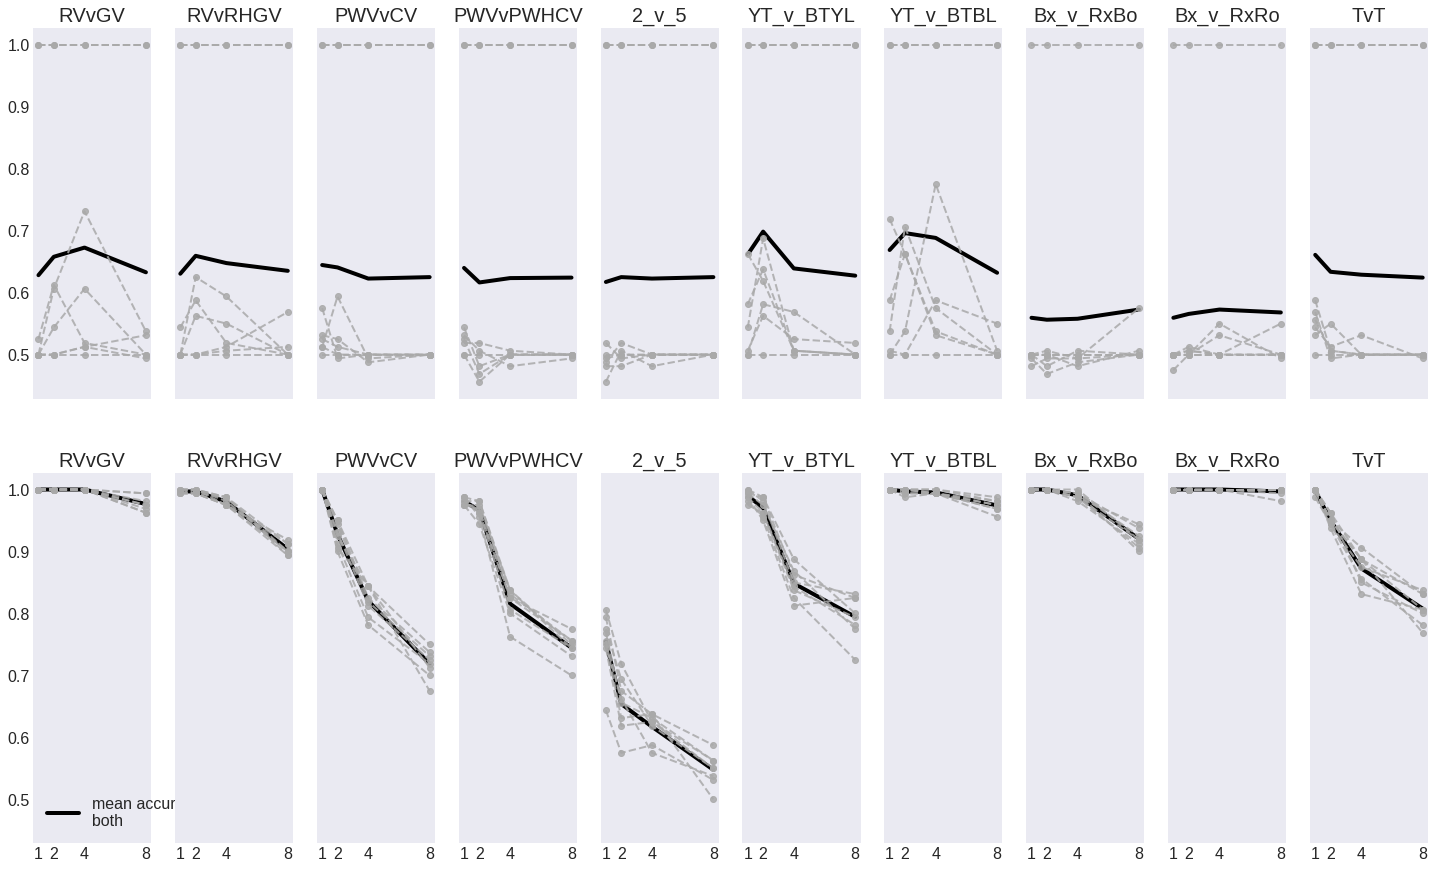

In [10]:
figsize=(25,15)
fig, ax = plt.subplots(2, 10, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

net_name = 'alexnet'
for row, method in enumerate(['initialize', 'transfer']):
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'],
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'])):
            if row==1 and col==0:
                add_legend=True
            else:
                add_legend=False

            both_color = pal[0]
            mn_both_color = pal[0]
                
            searchnets.plot.metric_v_set_size_df(df=df, 
                                                 net_name=net_name,
                                                 method=method, 
                                                 stimulus=stim_abbrev,
                                                 metric='accuracy', 
                                                 conditions=['both'],
                                                 set_ylim=False,
                                                 ax=ax[row, col],
                                                 ylim=(0.5, 1.05),
                                                 add_legend=add_legend)
            ax[row,col].set_title(stim_abbrev)